In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
def load_nuscenes_images(nuscenes_root, camera="CAM_FRONT"):
    """
    Collect all image paths from a specific nuScenes camera folder.

    Example expected structure:
    nuscenes_root/
        samples/
            CAM_FRONT/
                *.jpg
    """
    img_dir = os.path.join(nuscenes_root, "samples", camera)
    image_paths = sorted(glob(os.path.join(img_dir, "*.jpg")))
    if len(image_paths) == 0:
        raise RuntimeError(f"No images found in {img_dir}")
    return image_paths


def compute_fft(image_gray):
    """
    Compute 2D FFT and return shifted FFT and magnitude spectrum.
    """
    fft = np.fft.fft2(image_gray)
    fft_shift = np.fft.fftshift(fft)
    magnitude = np.abs(fft_shift)
    return fft_shift, magnitude


def extract_frequencies(magnitude):
    """
    Compute frequency grid and corresponding magnitudes.
    """
    h, w = magnitude.shape

    fx = np.fft.fftshift(np.fft.fftfreq(w))
    fy = np.fft.fftshift(np.fft.fftfreq(h))
    fx_grid, fy_grid = np.meshgrid(fx, fy)

    freq_radius = np.sqrt(fx_grid**2 + fy_grid**2)

    return freq_radius.flatten(), magnitude.flatten()


def plot_frequency_spectrum(freqs, mags, title):
    """
    Scatter plot of frequency vs magnitude.
    """
    plt.figure(figsize=(8, 6))
    # plt.scatter(freqs, np.log1p(mags), s=1)
    plt.scatter(freqs, mags, s=1)
    plt.yscale('log')
    plt.xlabel("Frequency radius")
    plt.ylabel("Log Magnitude")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def analyze_image_fft(nuscenes_root, image_index, camera="CAM_FRONT"):
    """
    Full pipeline:
    - Load image by index
    - Compute FFT
    - Extract frequencies
    - Plot spectrum
    """
    image_paths = load_nuscenes_images(nuscenes_root, camera)

    if image_index >= len(image_paths):
        raise IndexError("Image index out of range")

    img_path = image_paths[image_index]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise RuntimeError(f"Failed to load image: {img_path}")

    fft_shift, magnitude = compute_fft(img)
    freqs, mags = extract_frequencies(magnitude)

    plot_frequency_spectrum(
        freqs,
        mags,
        title=f"FFT Frequency Spectrum (Index {image_index})"
    )

    return freqs, mags

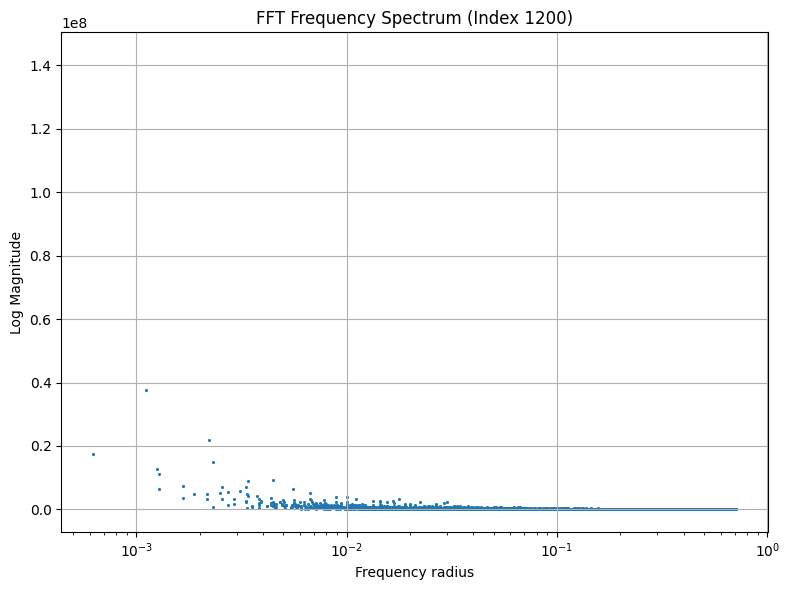

(array([0.70710678, 0.70666498, 0.70622345, ..., 0.70499549, 0.70543723,
        0.70587925], shape=(1440000,)),
 array([ 87.        , 348.54450791, 340.76502471, ..., 643.75622149,
        488.61746513, 397.37940513], shape=(1440000,)))

In [16]:
nuscenes_root = "/storage/experiments-ml/datasets/nuscenes"
image_index = 1200
analyze_image_fft(nuscenes_root, image_index)